In [1]:
from mfe_model import MoehlisFaisstEckhardtModelControl, rk4_timestepping

from deeptime.clustering import KMeans, RegularSpace
import deeptime.markov as markov
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import math
import time

In [2]:
Re = 500.0
Lx = 1.75 * np.pi
Lz = 1.2 * np.pi

time_step = 0.001
n_steps = 15000000

In [3]:
m = MoehlisFaisstEckhardtModelControl(Re, Lx, Lz)

In [5]:
trajectory = np.loadtxt('time_series/trajectory_for_clustering.txt')

In [6]:
def random_initial_conditions(m_size):
    ic = np.zeros(m_size)
    ic = np.random.uniform(-0.05, 0.05, size=m_size)
    ic[0] = np.random.uniform(0, 0.05)
    ic[-1] = np.random.uniform(-0.05, 0)
    return ic

def generate_trajectory(model, time_step, n_steps):
    start_time = time.time()
    ic = random_initial_conditions(model.dim)
    trajectory = rk4_timestepping(model, ic, time_step, n_steps, time_skip = 1000, debug = False)
    print("%s seconds" % (time.time() - start_time))
    return trajectory[:-1:]

def show_energy(trajectory, label):
    ek = model.kinetic_energy(trajectory)
    if label:
        plt.plot(np.arange(len(trajectory)), ek, linewidth=0.7, color = label, markersize = 0.5)
    else:
        plt.plot(np.arange(len(trajectory)), ek,  linewidth=1, markersize = 0.5)
    plt.xlabel("$t$")
    plt.ylabel("$E$")
    return ek

In [7]:
def get_B(model, trajectory):
    da = np.zeros_like(trajectory)
    
    for i in range(len(trajectory)):
        da[i] = model.f(trajectory[i])
    
    return da

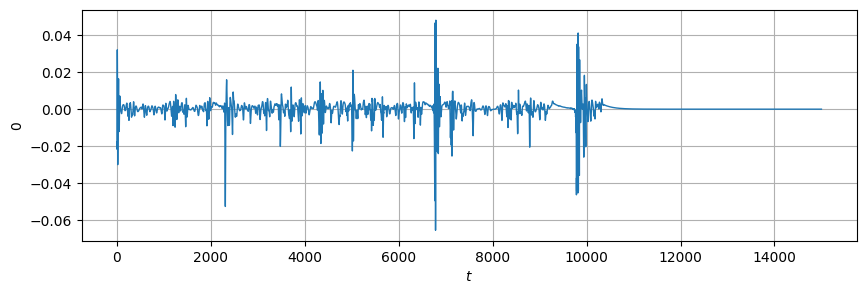

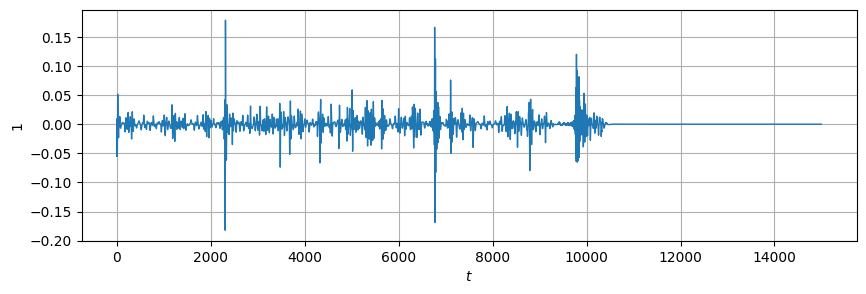

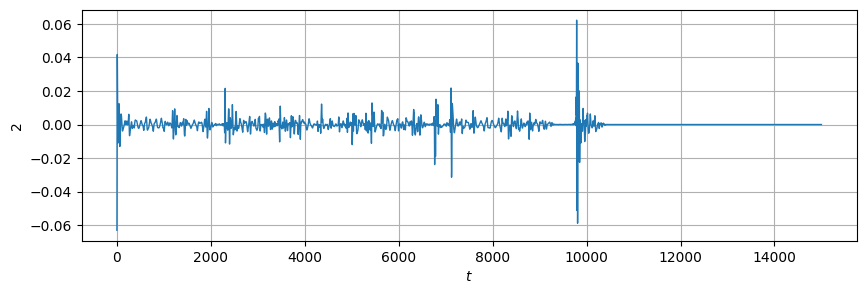

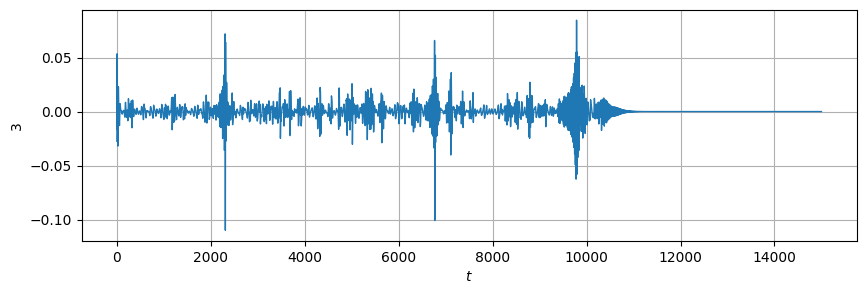

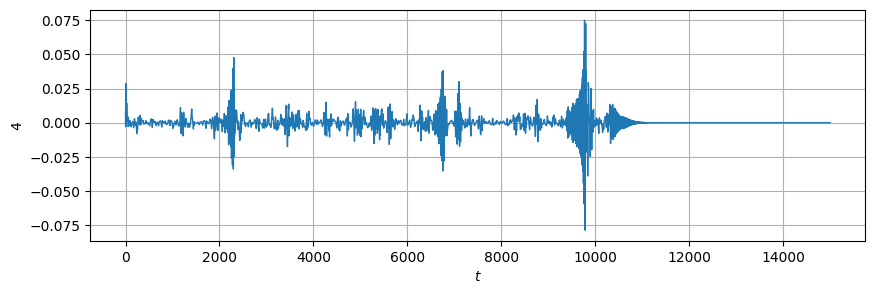

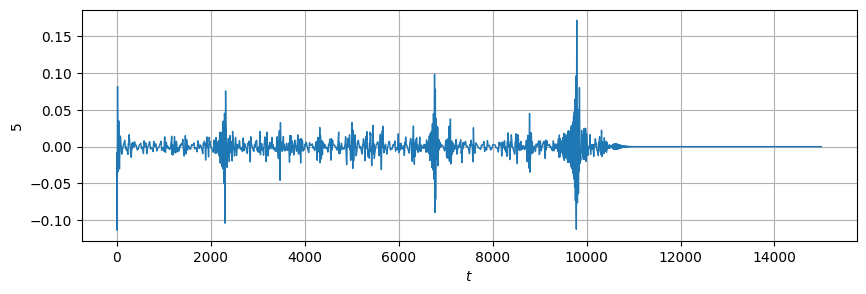

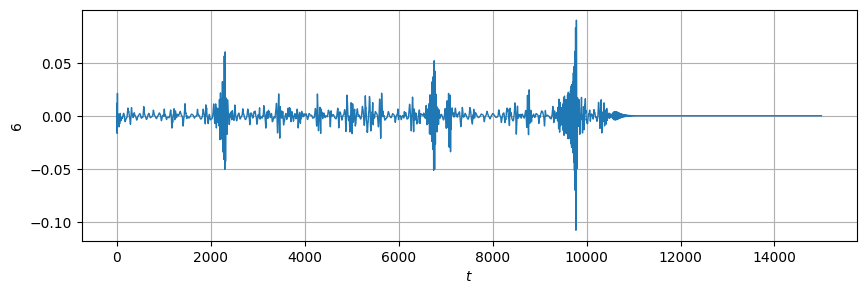

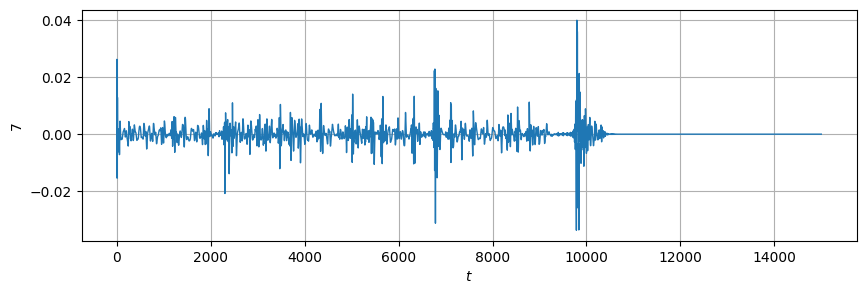

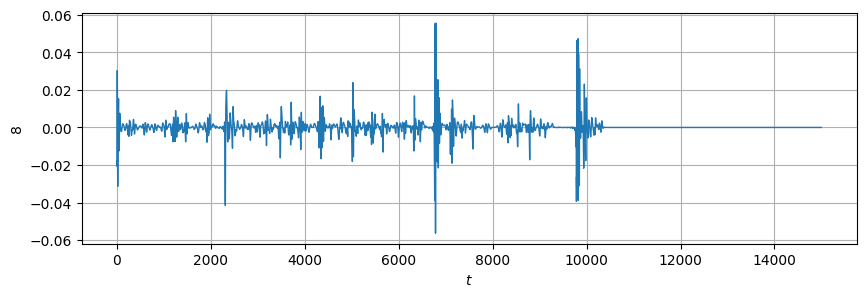

In [8]:
def show_B(da):
    da_T = da.T
    for i in range(len(da_T)):
        plt.figure(figsize=(10,3))
        plt.plot(np.arange(len(da)), da_T[i],  linewidth=1, markersize = 0.5)
        plt.xlabel("$t$")
        plt.ylabel(i)
        plt.grid()
        plt.show()
        
da = get_B(m, trajectory)
show_B(da)

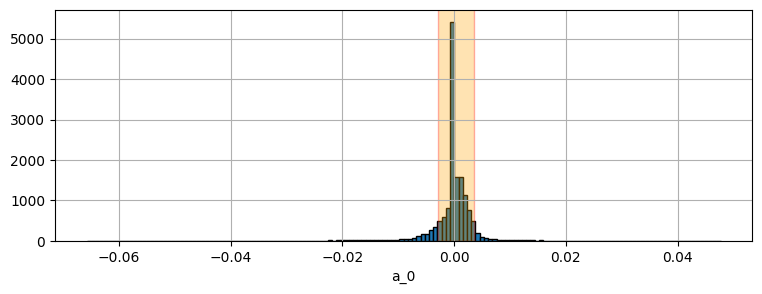

Диапазон:  -0.06540574795545785 0.04806884670935986
Стандартное отклонение:  0.004357393921244938
10-й процентиль:  -0.0028012003800143436
90-й процентиль:  0.0029756778285947773


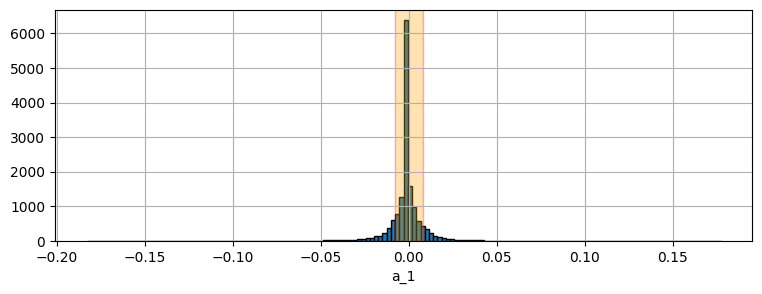

Диапазон:  -0.18207857173549696 0.1785153956861224
Стандартное отклонение:  0.010484814547493665
10-й процентиль:  -0.00802928535834155
90-й процентиль:  0.00829123642749294


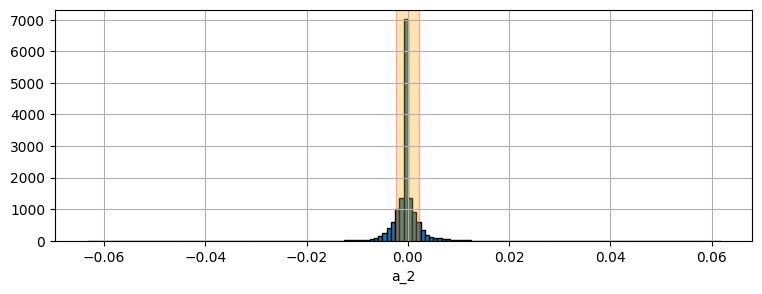

Диапазон:  -0.0630462952161189 0.06220752362024476
Стандартное отклонение:  0.0032861947584863407
10-й процентиль:  -0.0022961550739953426
90-й процентиль:  0.002280339379111385


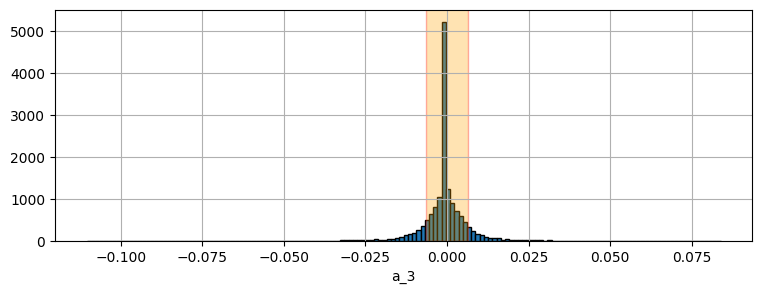

Диапазон:  -0.10978596010407779 0.08449959952748543
Стандартное отклонение:  0.0073179252147911175
10-й процентиль:  -0.006361325418399421
90-й процентиль:  0.0063232166052436135


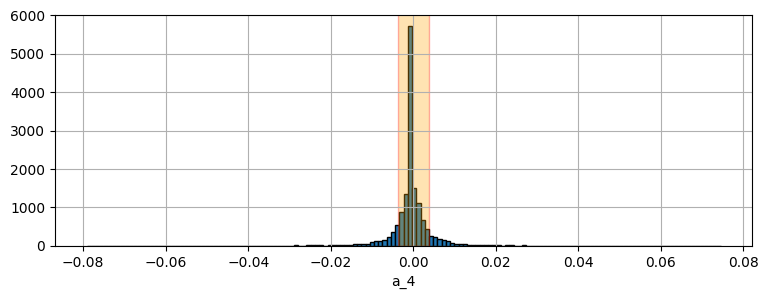

Диапазон:  -0.07867651122699842 0.07498366127931455
Стандартное отклонение:  0.005533217935277496
10-й процентиль:  -0.0038042254984018108
90-й процентиль:  0.003909255960777186


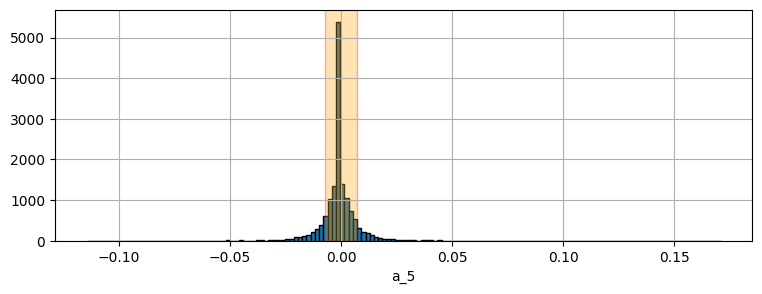

Диапазон:  -0.11366669541871488 0.17187976632497487
Стандартное отклонение:  0.009721023529686937
10-й процентиль:  -0.007407031273652843
90-й процентиль:  0.0073600055630375395


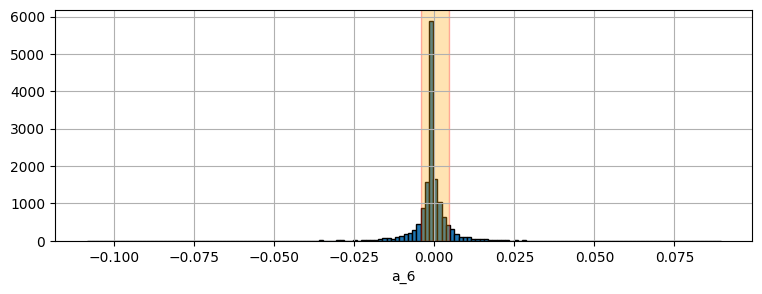

Диапазон:  -0.1079271217326731 0.09008032596017389
Стандартное отклонение:  0.006580368033730574
10-й процентиль:  -0.004289558765375005
90-й процентиль:  0.004542858428470943


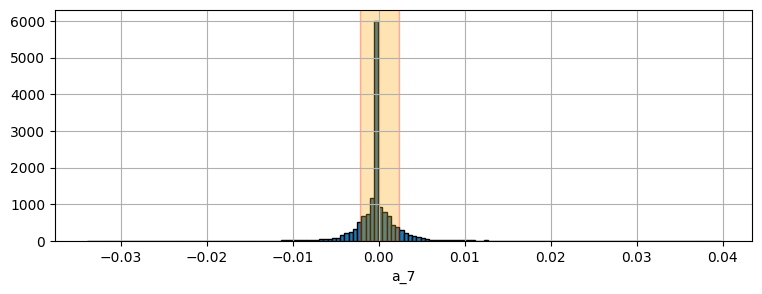

Диапазон:  -0.03371463590436712 0.039997985749528384
Стандартное отклонение:  0.00281089694234058
10-й процентиль:  -0.002217591570236068
90-й процентиль:  0.002364827299504204


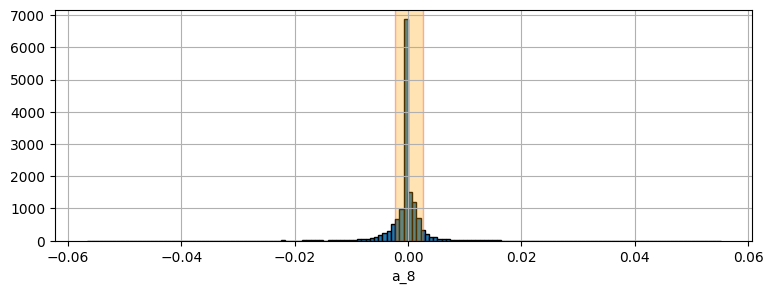

Диапазон:  -0.05631792219837408 0.05549390177718022
Стандартное отклонение:  0.004011885774847411
10-й процентиль:  -0.00236905775894396
90-й процентиль:  0.002178549611557962


In [9]:
def show_B_distribution(da):
    da_T = da.T
    for i in range(len(da_T)):
        step_val = (da_T[i].max() - da_T[i].min())/150
        step = (np.percentile(da_T[i], 90) - np.percentile(da_T[i], 10))/10
    
        count, bins = np.histogram(da_T[i], 150)
        
        plt.figure(figsize=(9,3))
        plt.bar(bins[:-1], count, width = step_val, edgecolor = 'black')
        plt.hist(np.repeat(np.arange(np.percentile(da_T[i], 10), np.percentile(da_T[i], 90)+step, step), count.max()/10), 
                 bins = 1, color = 'orange', alpha = 0.3, edgecolor = 'red')
  
        plt.ylim((0, count.max()+300))
        plt.xlabel(f'a_%d' % i)
        plt.grid()
        plt.show()

        print("Диапазон: ", da_T[i].min(), da_T[i].max())
        print("Стандартное отклонение: ", np.std(da_T[i]))
        print("10-й процентиль: ", np.percentile(da_T[i], 10))
        print("90-й процентиль: ", np.percentile(da_T[i], 90))
        
show_B_distribution(da)

In [10]:
def get_action(control_dim, control_range):
    control = np.zeros(control_dim) 
    for i in range(control_dim):
        control[i] = np.random.uniform(control_range[i][0], control_range[i][1])
    return(control)

In [11]:
time_step = 0.001
n_steps = 10000

In [12]:
def const_control(model, actions):
    
    for i in range(len(actions)):
        m.init_action(actions[i])

        test = generate_trajectory(m, time_step, n_steps)
        np.savetxt(f'time_series/ad_test{i}.txt', test)

actions = np.zeros((6, m.dim))
a = [[-0.0001, -0.0005], [0.0001, 0.0005], [0.00005, 0.0002], [-0.00005, -0.0002], [0.00005, 0.00001], [0.00001, 0.0002]]

for i in range(len(actions)):
    for j in range(len(a[i])):
        actions[i][j] = a[i][j]

const_control(m, actions)

2.5269904136657715 seconds
2.557588577270508 seconds
2.738035202026367 seconds
2.6216623783111572 seconds
2.574780225753784 seconds
2.4377777576446533 seconds


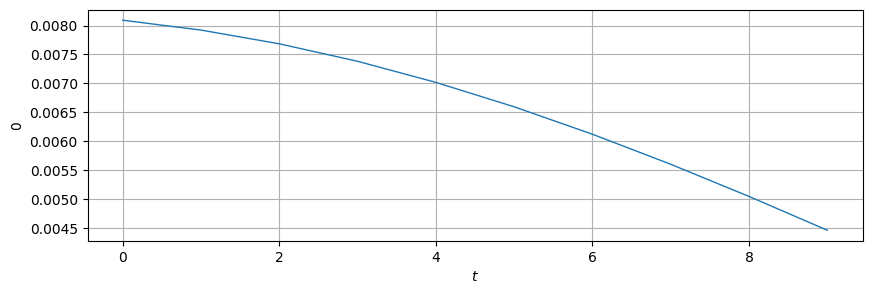

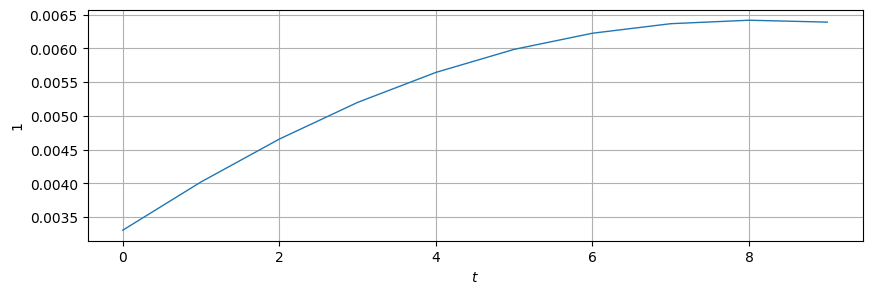

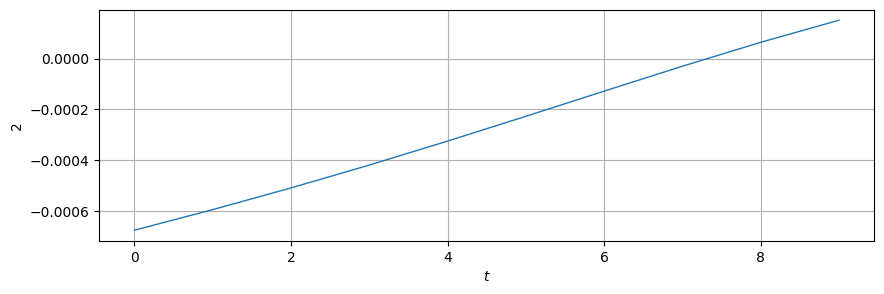

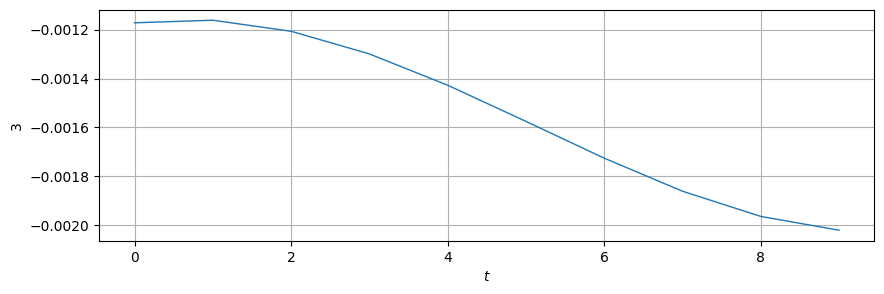

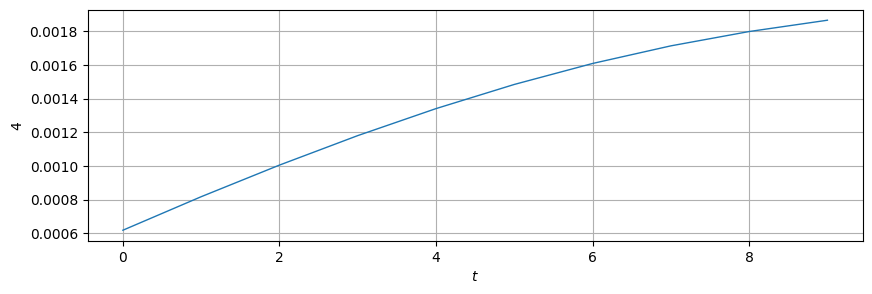

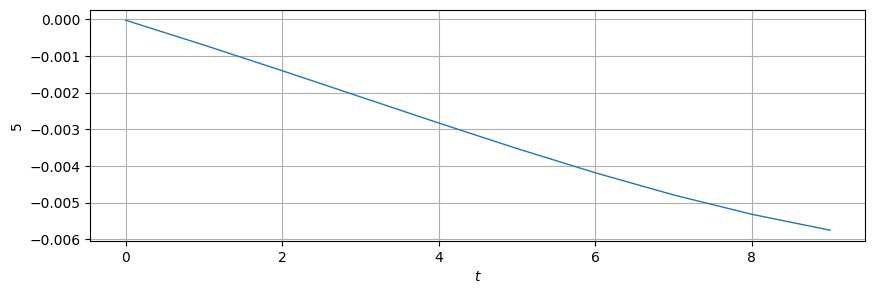

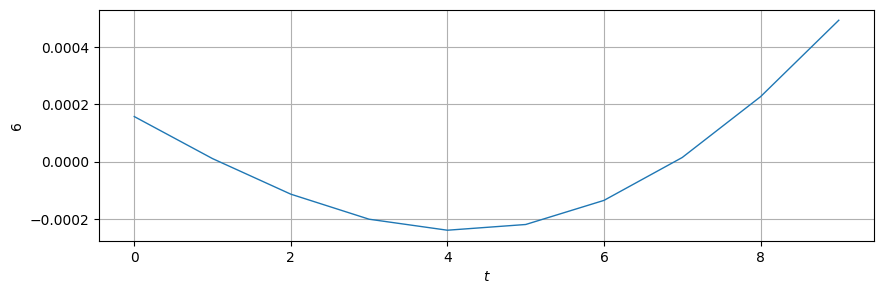

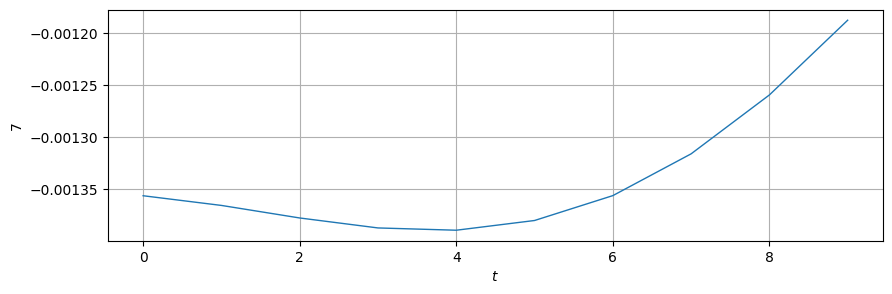

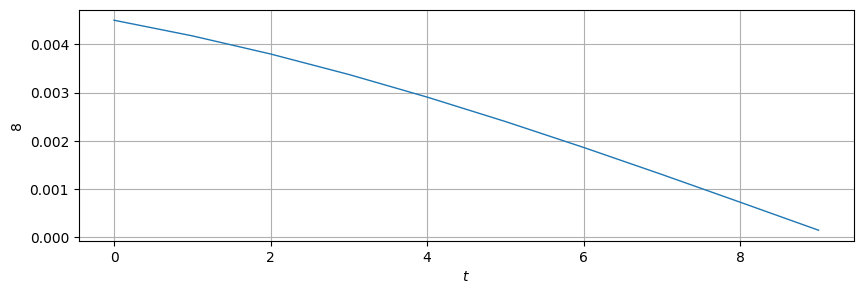

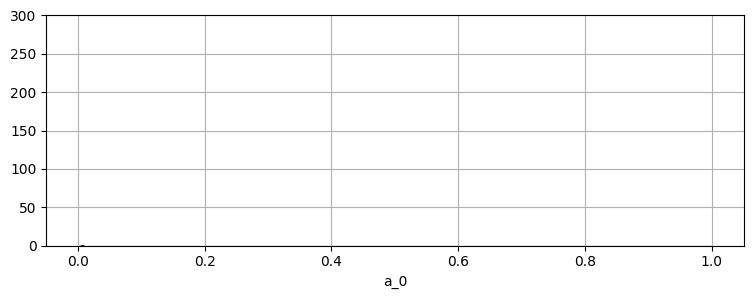

Диапазон:  0.0044571431968211785 0.008092307567733228
Стандартное отклонение:  0.0011910169506972586
10-й процентиль:  0.00498343639996705
90-й процентиль:  0.007938690238694347


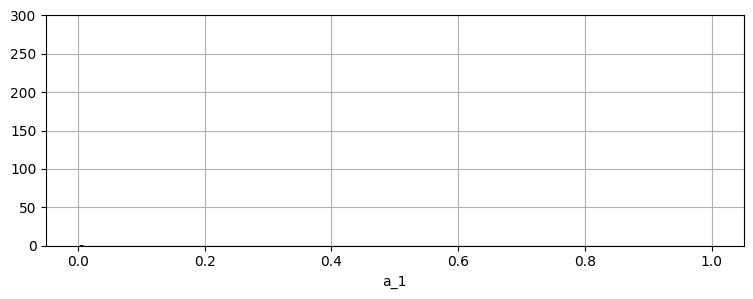

Диапазон:  0.0033026998892162086 0.006418003153850398
Стандартное отклонение:  0.0010455007662646767
10-й процентиль:  0.003947466734570346
90-й процентиль:  0.0063926393346256695


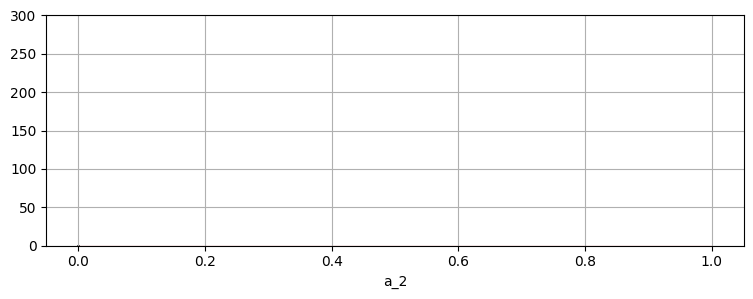

Диапазон:  -0.0006745450185415406 0.00015046918243078475
Стандартное отклонение:  0.0002679248676700673
10-й процентиль:  -0.0006017110504266842
90-й процентиль:  7.231373740511392e-05


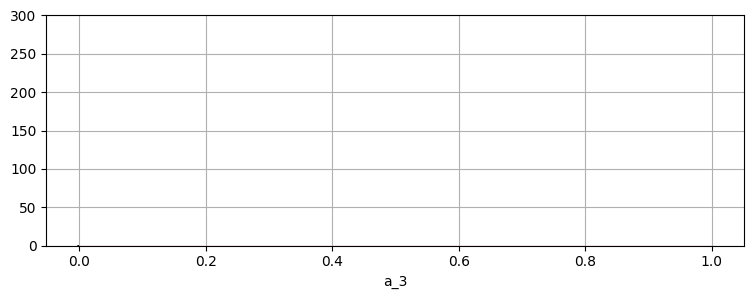

Диапазон:  -0.0020203100285814744 -0.00116161091858191
Стандартное отклонение:  0.0003176598793932537
10-й процентиль:  -0.001969522473377952
90-й процентиль:  -0.0011711164475205506


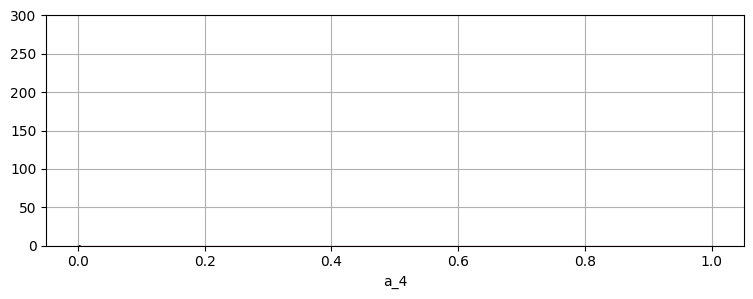

Диапазон:  0.0006188958224695819 0.0018653505283910841
Стандартное отклонение:  0.00040597261256796445
10-й процентиль:  0.0007979002565863882
90-й процентиль:  0.001804919007650747


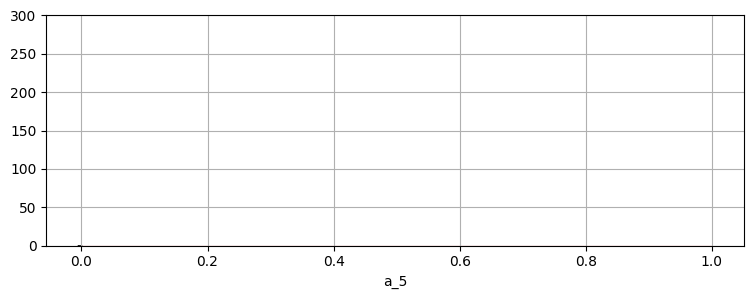

Диапазон:  -0.005749999993343421 -2.8078981141154932e-05
Стандартное отклонение:  0.0018768564642315092
10-й процентиль:  -0.005359765944706526
90-й процентиль:  -0.0006366976219905649


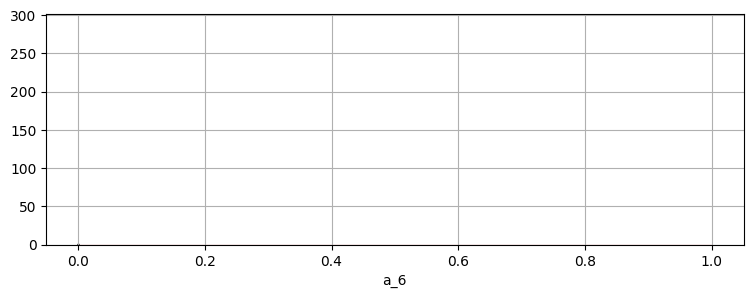

Диапазон:  -0.00024000350239731963 0.0004941422610998556
Стандартное отклонение:  0.000223314563307307
10-й процентиль:  -0.00022200164076965876
90-й процентиль:  0.00025350828797076957


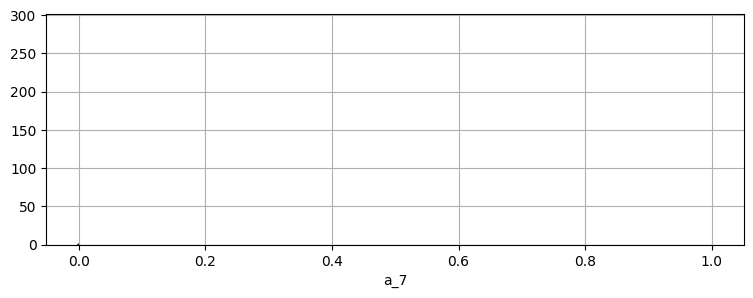

Диапазон:  -0.001389268502690699 -0.0011877077465059908
Стандартное отклонение:  6.245851871515728e-05
10-й процентиль:  -0.0013872957885452976
90-й процентиль:  -0.0012522653758600339


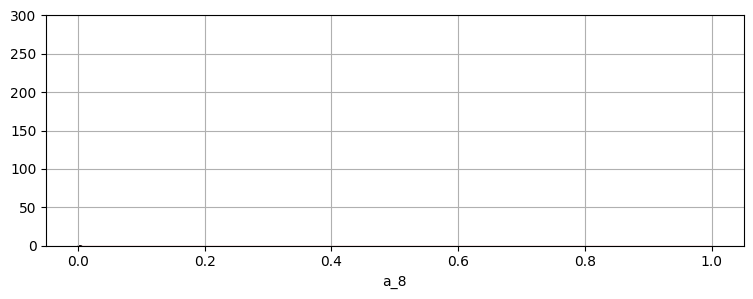

Диапазон:  0.0001413260108087477 0.0045029560413525
Стандартное отклонение:  0.0014155642728623675
10-й процентиль:  0.0006642220288076883
90-й процентиль:  0.004210798173184025


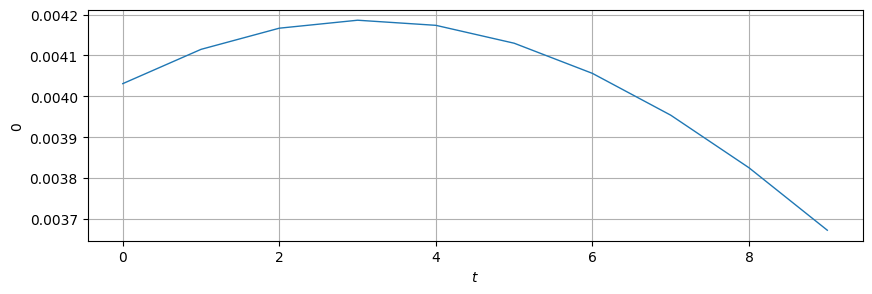

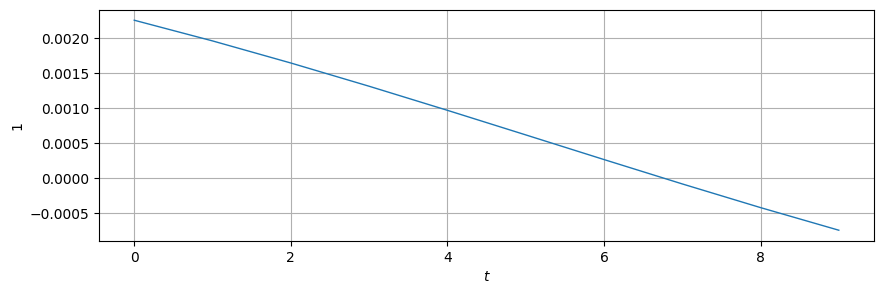

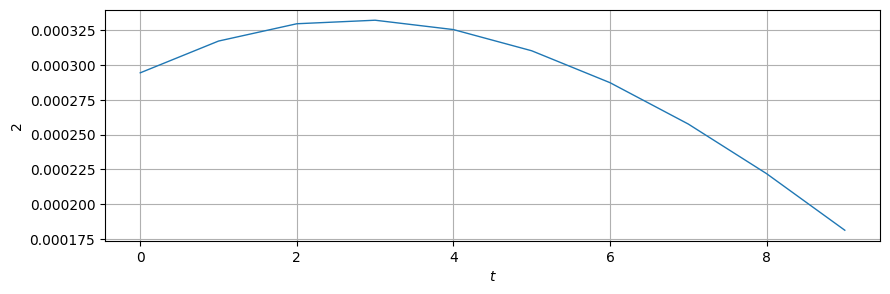

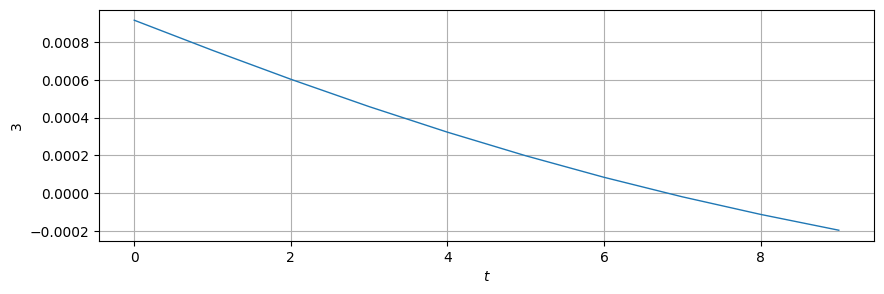

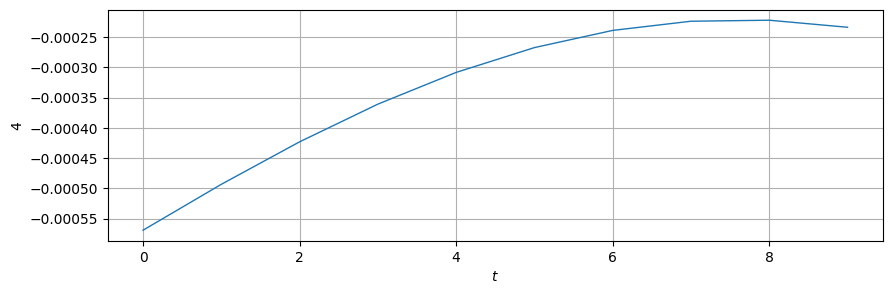

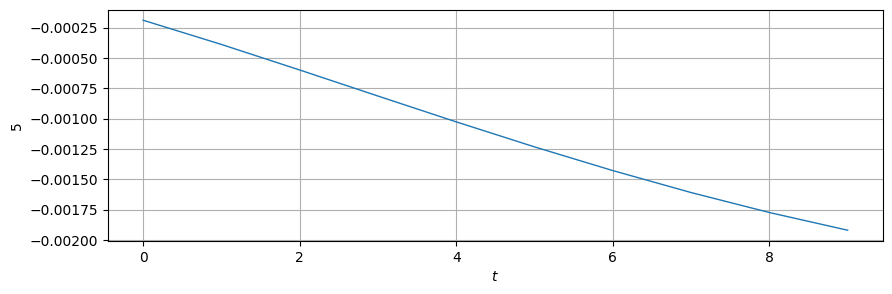

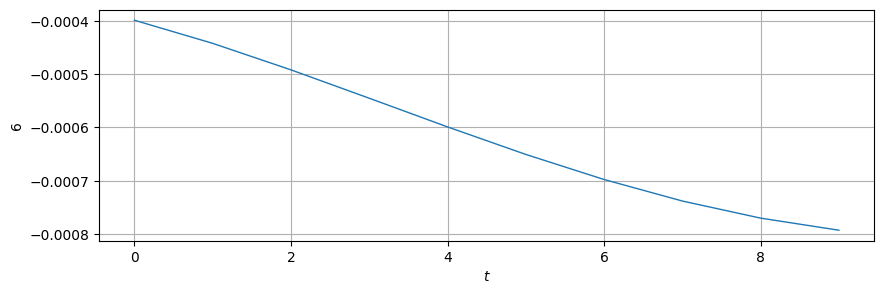

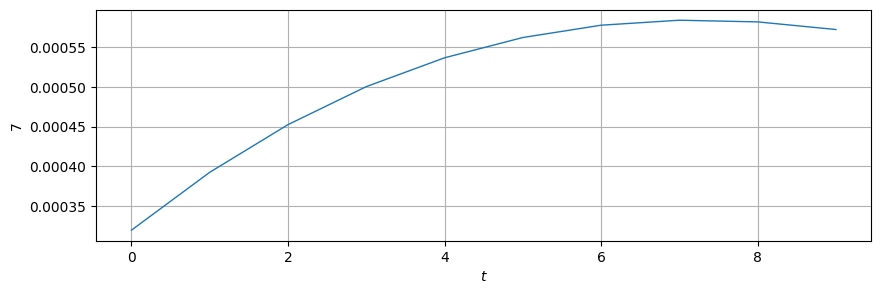

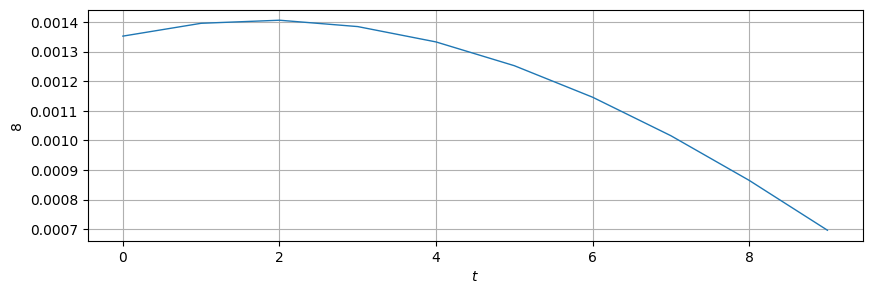

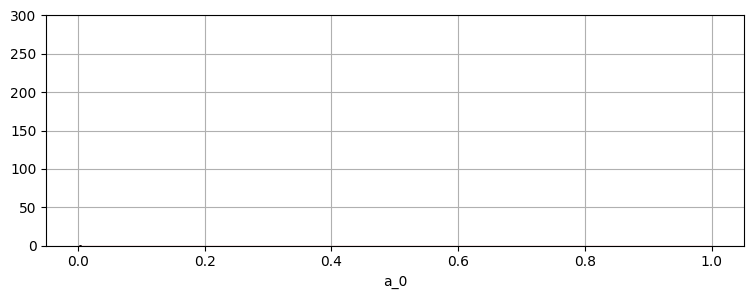

Диапазон:  0.0036724444035574192 0.0041862116417956015
Стандартное отклонение:  0.00016037926587306292
10-й процентиль:  0.0038099157083250888
90-й процентиль:  0.00417495282255042


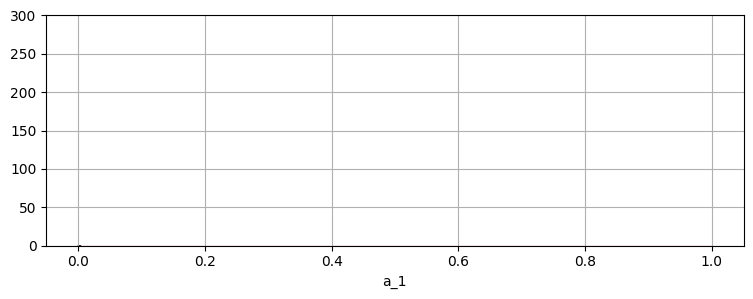

Диапазон:  -0.000745368107503802 0.002258452546753961
Стандартное отклонение:  0.0009727701206290217
10-й процентиль:  -0.0004541935080968792
90-й процентиль:  0.001992084013113073


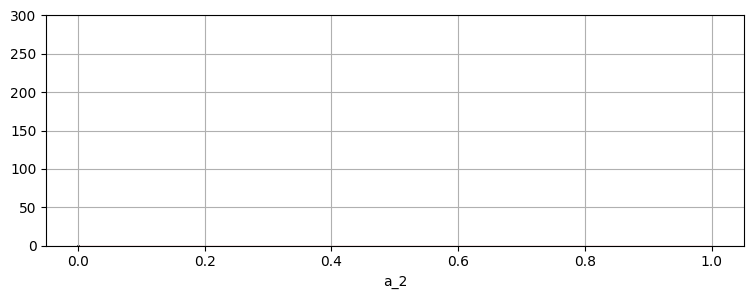

Диапазон:  0.00018114389264642334 0.00033238719406821556
Стандартное отклонение:  4.817379282530289e-05
10-й процентиль:  0.00021783519554279495
90-й процентиль:  0.00033009951567085827


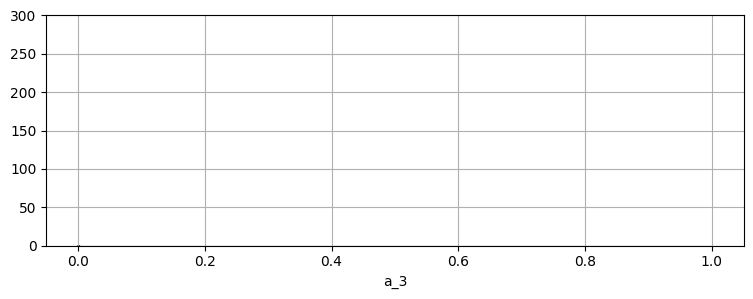

Диапазон:  -0.00019577067306235683 0.0009146208805117477
Стандартное отклонение:  0.0003572562305312722
10-й процентиль:  -0.00012040489070463782
90-й процентиль:  0.0007712520432320272


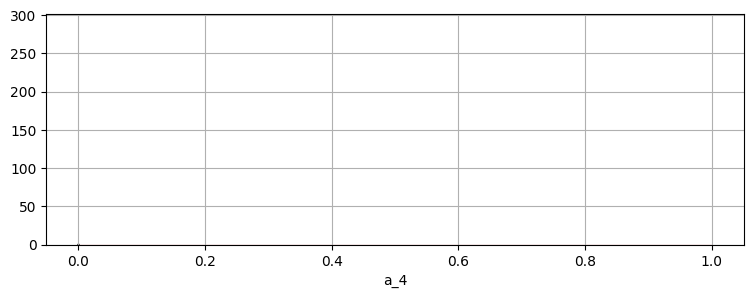

Диапазон:  -0.0005693059918475663 -0.00022211912379784524
Стандартное отклонение:  0.00011759987573462275
10-й процентиль:  -0.0005010152915586019
90-й процентиль:  -0.00022361838850240096


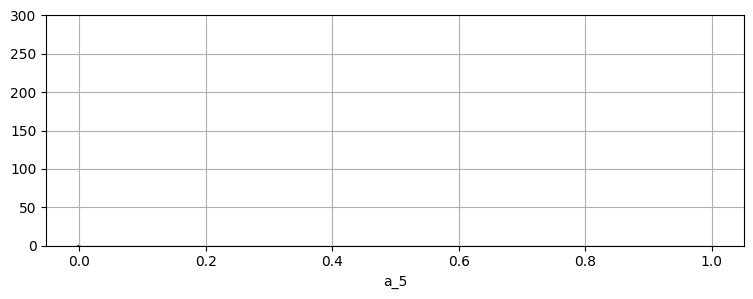

Диапазон:  -0.0019192729094355005 -0.00018960986758994073
Стандартное отклонение:  0.0005639925400925171
10-й процентиль:  -0.0017880100549511775
90-й процентиль:  -0.0003691772786585718


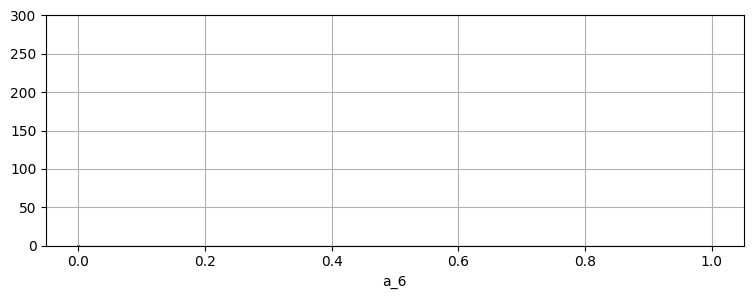

Диапазон:  -0.000792836501105584 -0.00039878025348114157
Стандартное отклонение:  0.000132589203693388
10-й процентиль:  -0.0007724238924690884
90-й процентиль:  -0.0004378257553309218


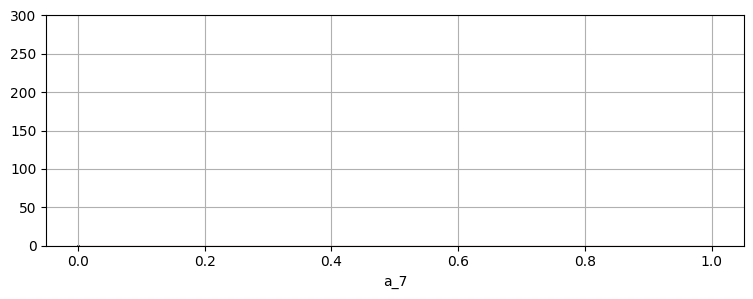

Диапазон:  0.0003194754892038641 0.0005841233250253969
Стандартное отклонение:  8.724533064960626e-05
10-й процентиль:  0.0003851166933572725
90-й процентиль:  0.0005822347809632601


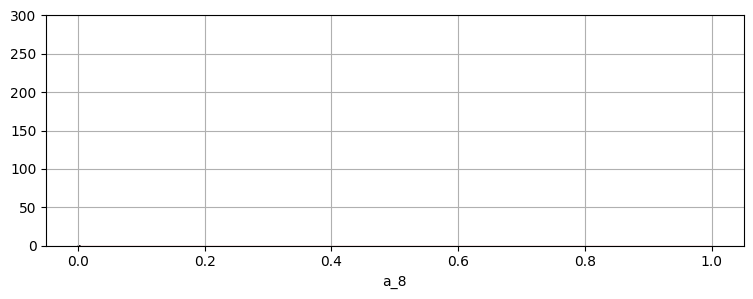

Диапазон:  0.0006968360966266192 0.001406360174680825
Стандартное отклонение:  0.00023633784088923757
10-й процентиль:  0.0008484798715122544
90-й процентиль:  0.0013970311678198038


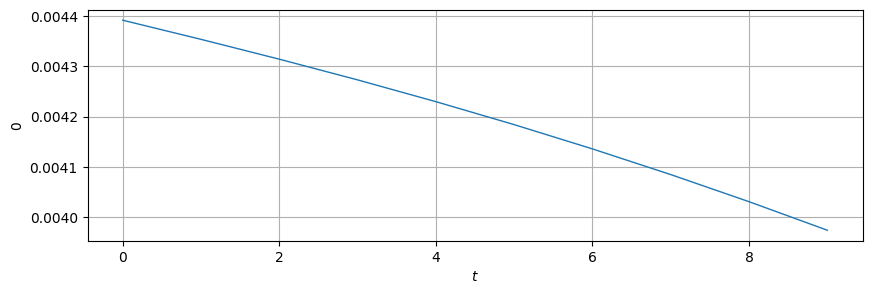

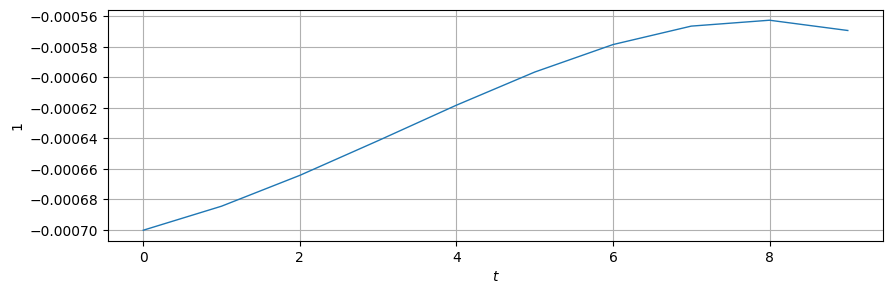

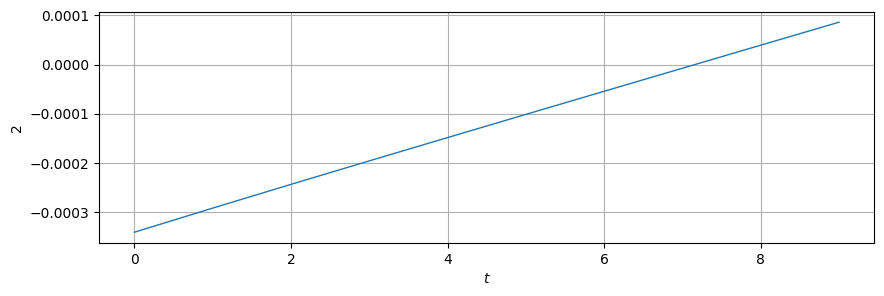

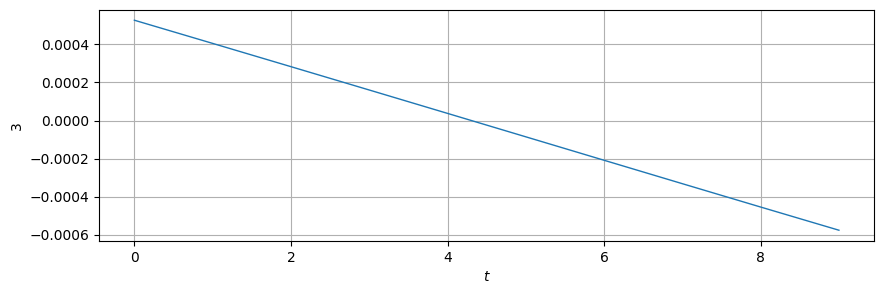

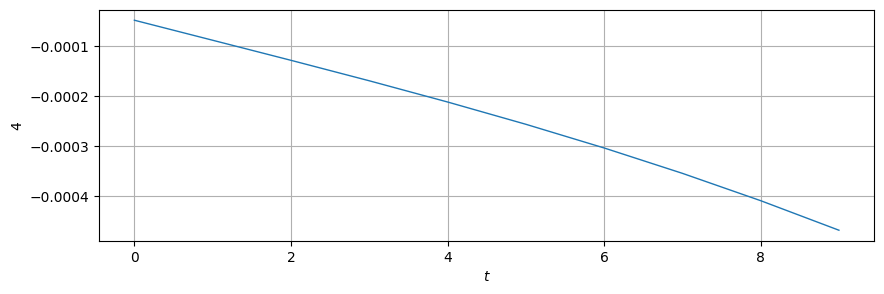

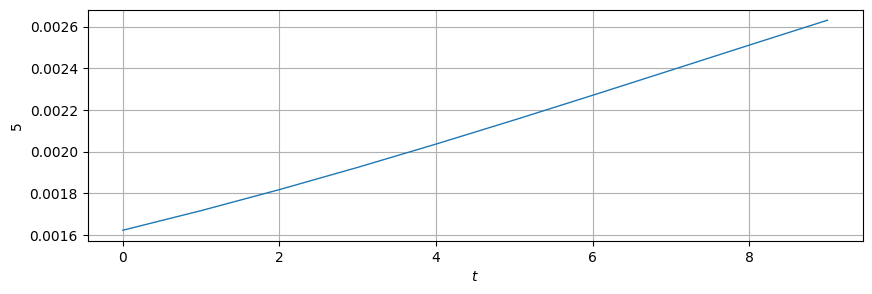

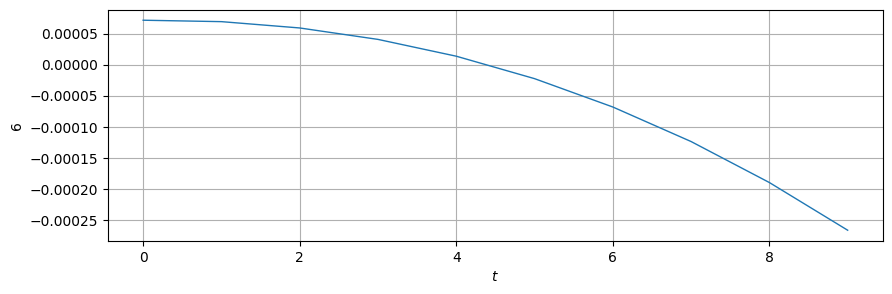

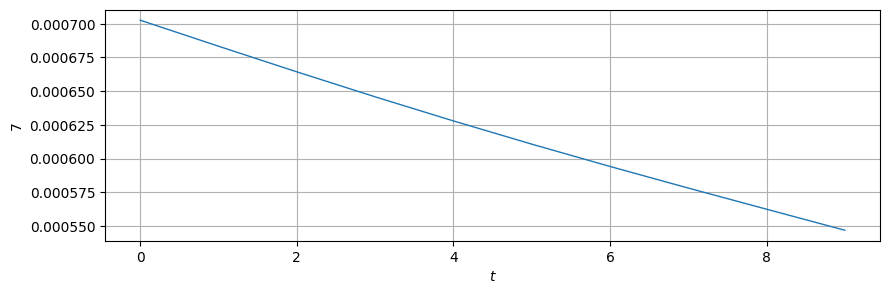

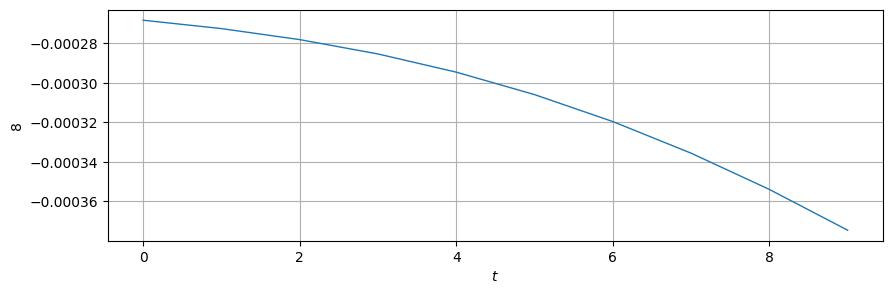

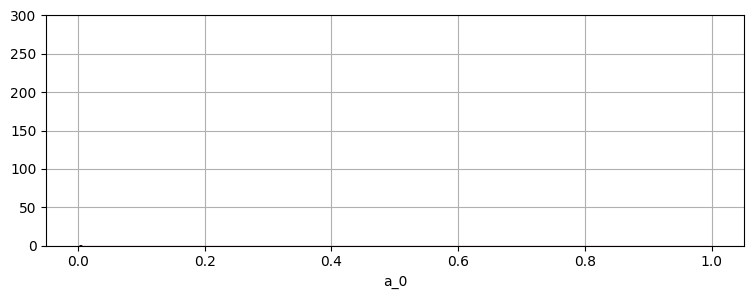

Диапазон:  0.003973835285486822 0.0043915523022979115
Стандартное отклонение:  0.00013301773645262016
10-й процентиль:  0.004024939642064968
90-й процентиль:  0.004357298063791763


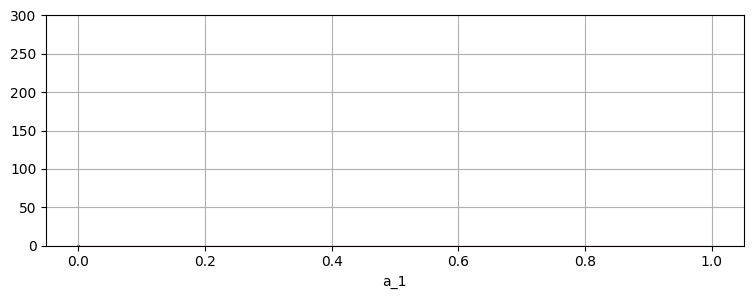

Диапазон:  -0.0007002050364976441 -0.0005625180055078213
Стандартное отклонение:  4.899433319340119e-05
10-й процентиль:  -0.0006860251804036495
90-й процентиль:  -0.0005659974708230864


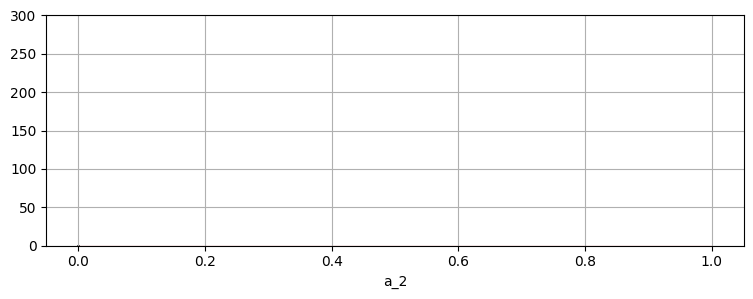

Диапазон:  -0.00034075107349845106 8.602427263234993e-05
Стандартное отклонение:  0.00013595916245984983
10-й процентиль:  -0.00029666109602283534
90-й процентиль:  4.398759864887131e-05


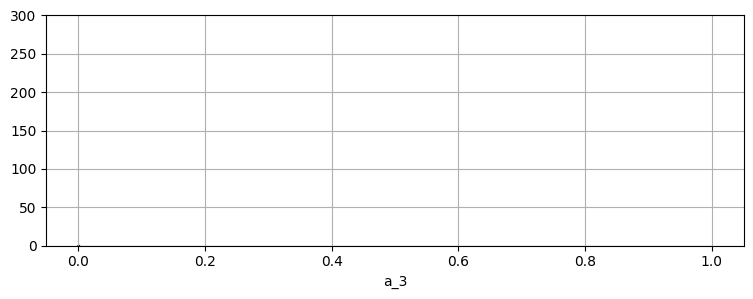

Диапазон:  -0.0005764566397273141 0.000526946691928112
Стандартное отклонение:  0.0003525821506071573
10-й процентиль:  -0.00046683470419670514
90-й процентиль:  0.0004173118286913551


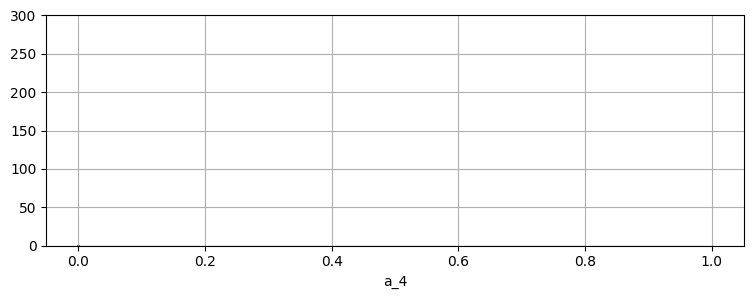

Диапазон:  -0.00046832619422591294 -4.9076760551534555e-05
Стандартное отклонение:  0.0001324304808851395
10-й процентиль:  -0.00041522437803148975
90-й процентиль:  -8.50543782900099e-05


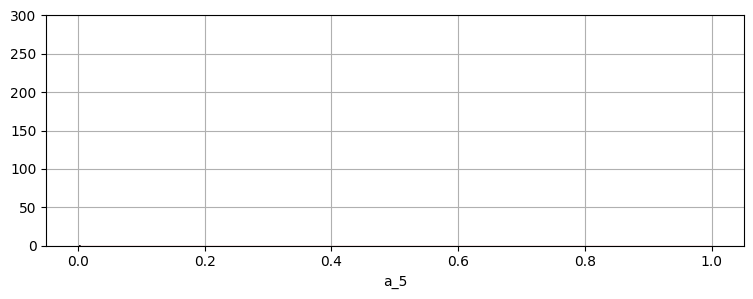

Диапазон:  0.0016224701458847123 0.002630565691624625
Стандартное отклонение:  0.0003249091070344477
10-й процентиль:  0.001707180673204792
90-й процентиль:  0.00252290832356562


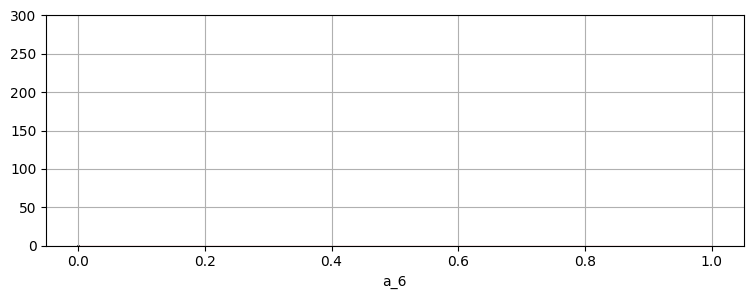

Диапазон:  -0.00026659742017865693 7.143322350431482e-05
Стандартное отклонение:  0.00011197621752299361
10-й процентиль:  -0.00019752653616153147
90-й процентиль:  6.937434097754052e-05


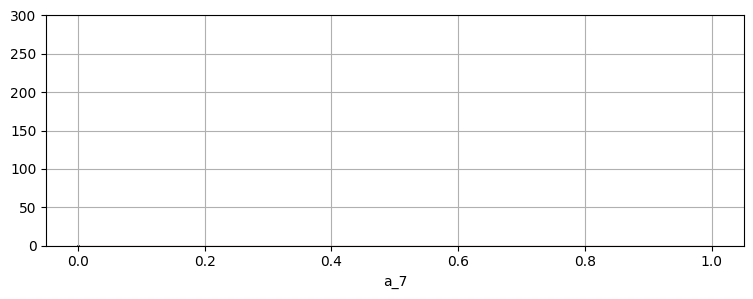

Диапазон:  0.0005467850248464774 0.0007026086446678003
Стандартное отклонение:  4.969078352238248e-05
10-й процентиль:  0.0005608324812361482
90-й процентиль:  0.0006852502904431909


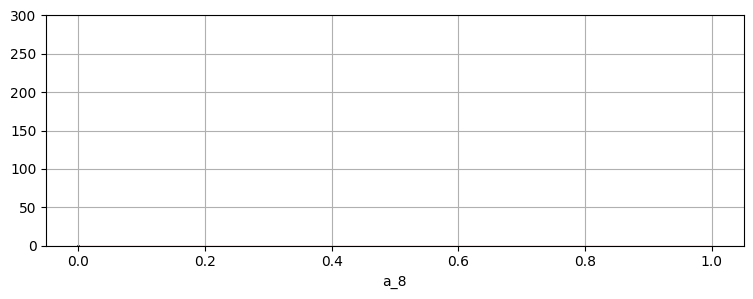

Диапазон:  -0.000374548291498478 -0.00026837695511224485
Стандартное отклонение:  3.4396617680610165e-05
10-й процентиль:  -0.0003559942154341223
90-й процентиль:  -0.0002721807929522617


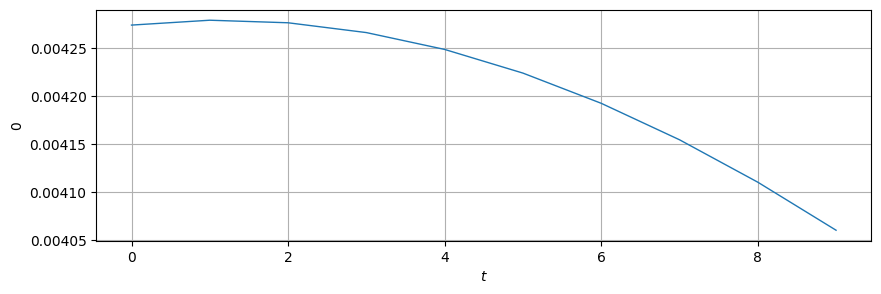

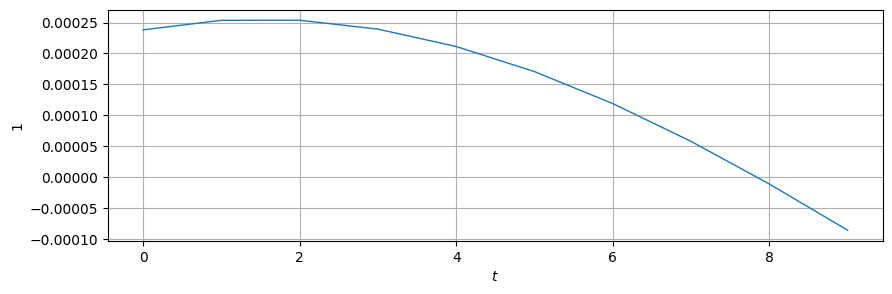

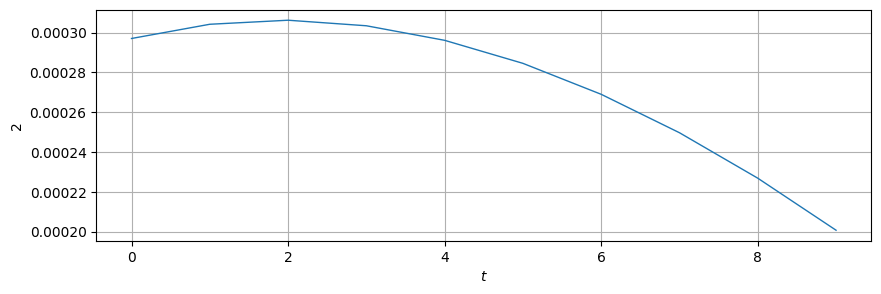

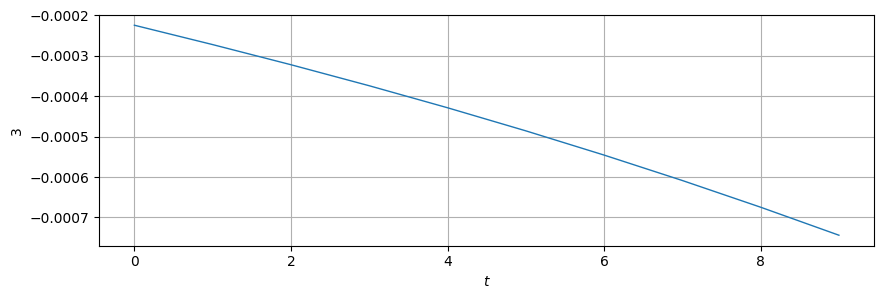

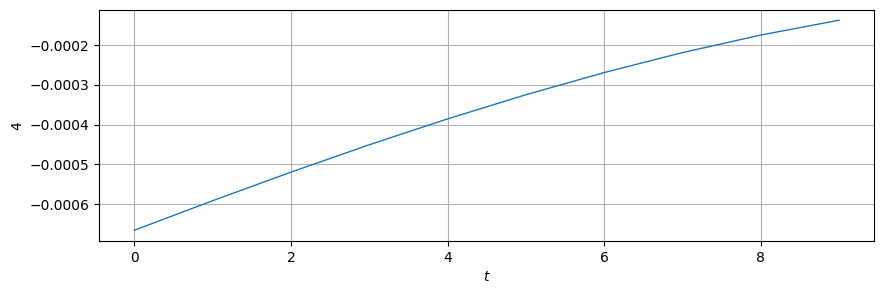

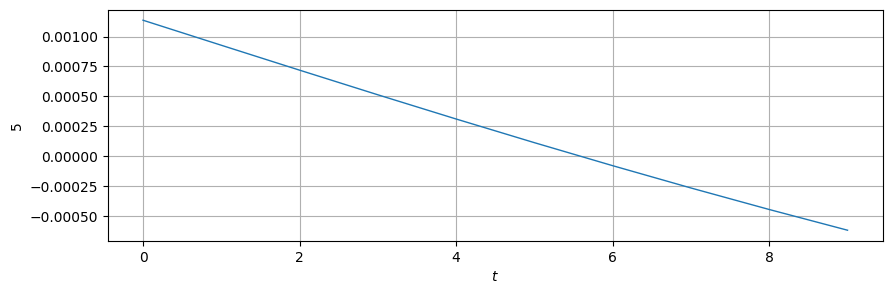

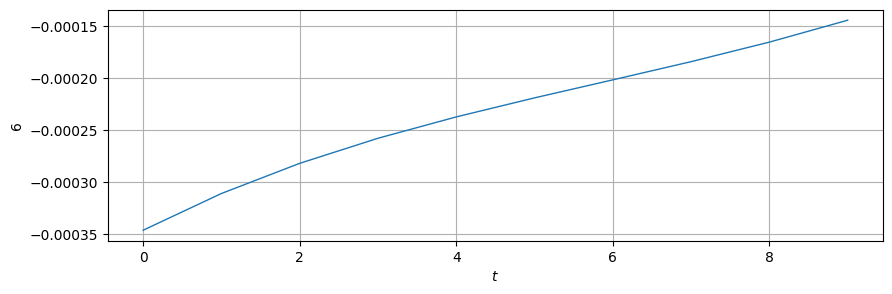

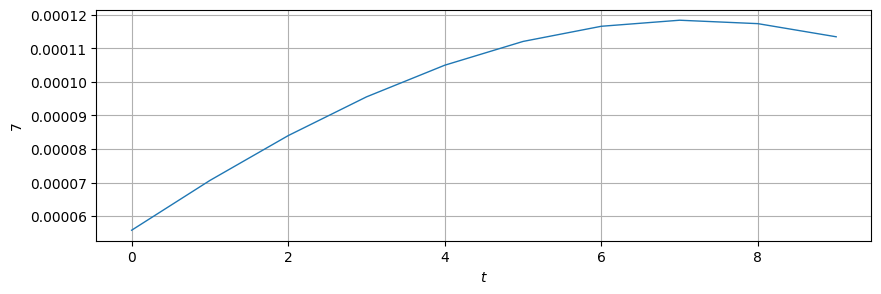

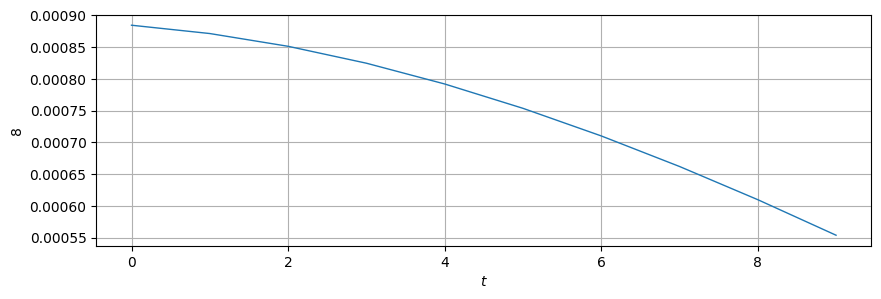

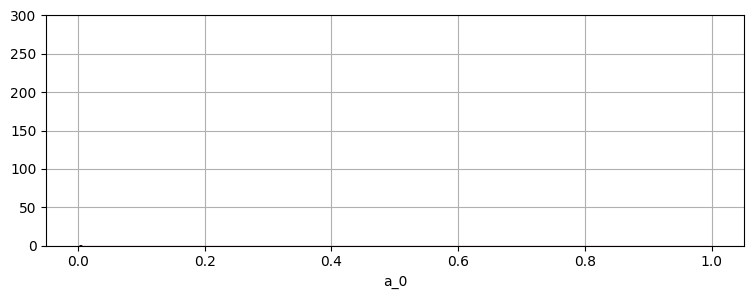

Диапазон:  0.004060110055127202 0.004278771327344481
Стандартное отклонение:  7.33303335647839e-05
10-й процентиль:  0.0041051311376601425
90-й процентиль:  0.004276378933741233


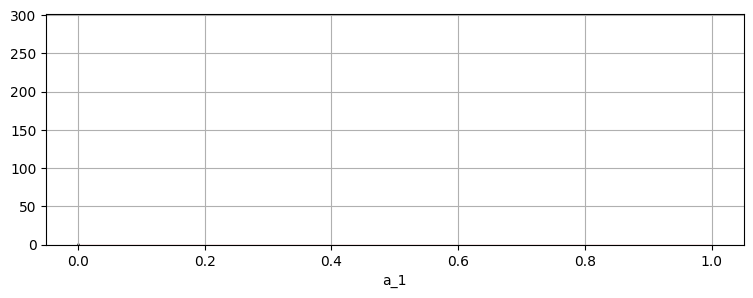

Диапазон:  -8.522342914384079e-05 0.0002537048090378633
Стандартное отклонение:  0.00011475512527005581
10-й процентиль:  -1.8142585012157888e-05
90-й процентиль:  0.0002535581620113842


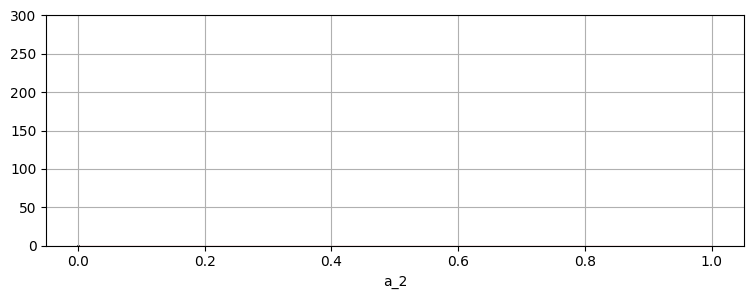

Диапазон:  0.00020069343409205004 0.0003061865128534803
Стандартное отклонение:  3.486202808650572e-05
10-й процентиль:  0.00022421836774692304
90-й процентиль:  0.00030435831349782033


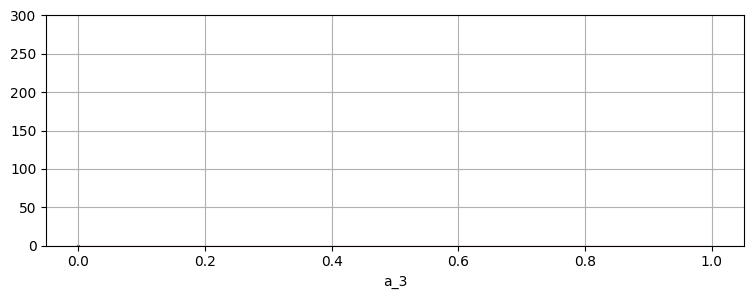

Диапазон:  -0.0007440699815231852 -0.00022413781480375942
Стандартное отклонение:  0.00016572169954099636
10-й процентиль:  -0.0006816610501712035
90-й процентиль:  -0.00026731933616487975


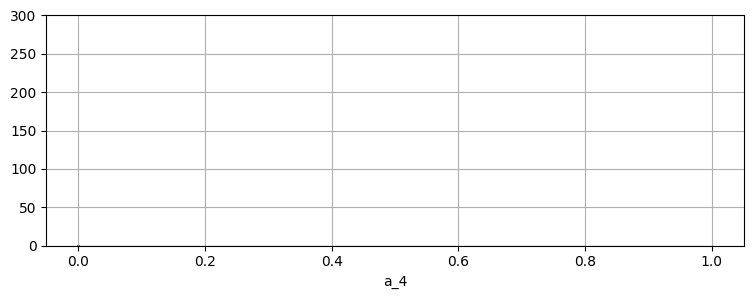

Диапазон:  -0.0006653399245407459 -0.00013813910552417402
Стандартное отклонение:  0.00017072811401742583
10-й процентиль:  -0.0005986410634477817
90-й процентиль:  -0.00017175065731499532


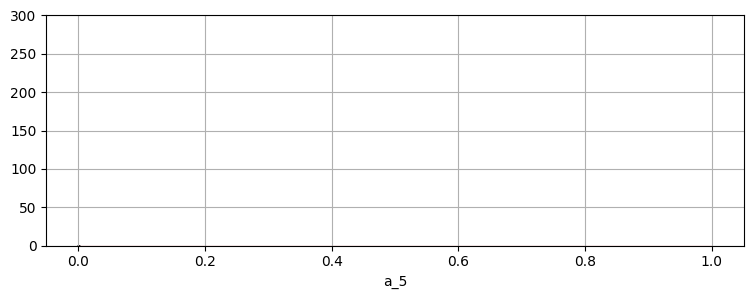

Диапазон:  -0.0006177485069198556 0.0011359919339129847
Стандартное отклонение:  0.0005622027972000783
10-й процентиль:  -0.0004620963214523229
90-й процентиль:  0.0009479432620637603


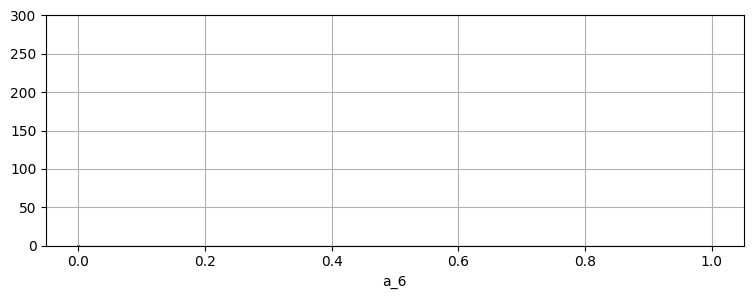

Диапазон:  -0.00034614706480949674 -0.0001439669553287188
Стандартное отклонение:  6.163625403182887e-05
10-й процентиль:  -0.00031433343367317856
90-й процентиль:  -0.00016293492137521792


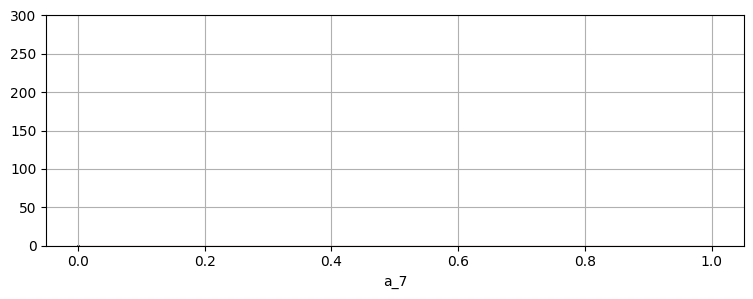

Диапазон:  5.580490205328665e-05 0.00011839458317790377
Стандартное отклонение:  2.0846493316540202e-05
10-й процентиль:  6.915568861897197e-05
90-й процентиль:  0.00011747383790724621


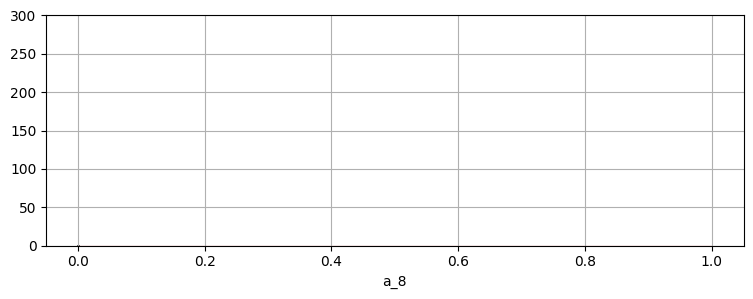

Диапазон:  0.000553858329127404 0.0008844745540738815
Стандартное отклонение:  0.00010855803047753239
10-й процентиль:  0.0006042247341417831
90-й процентиль:  0.0008726909879076927


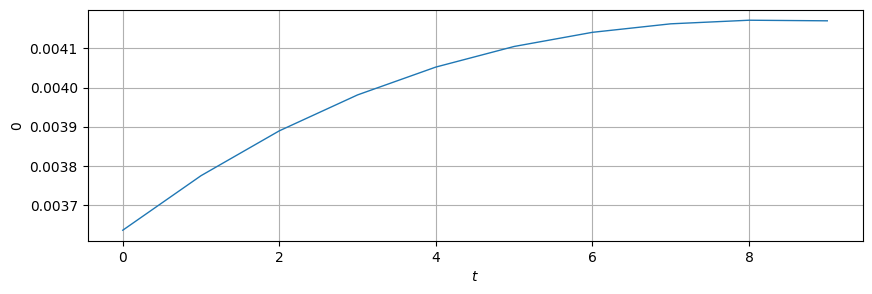

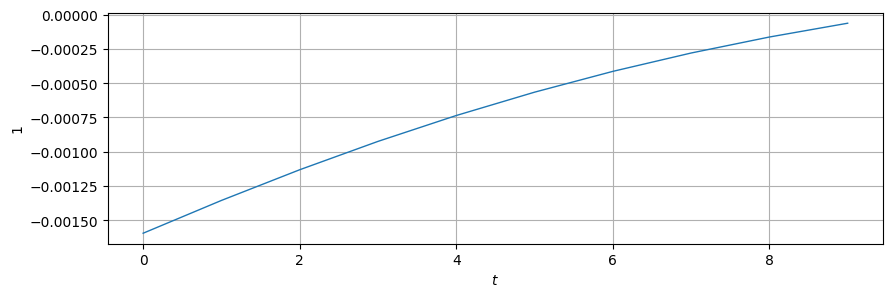

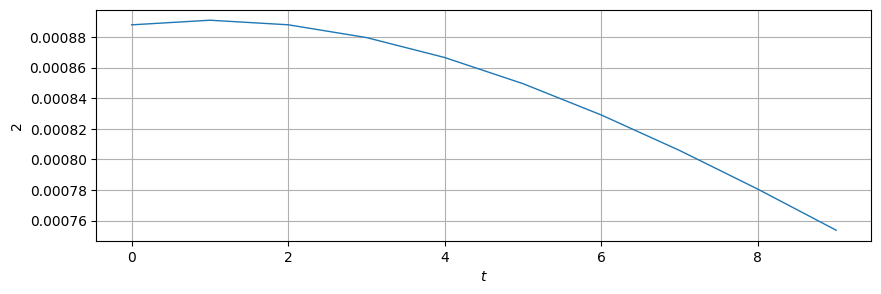

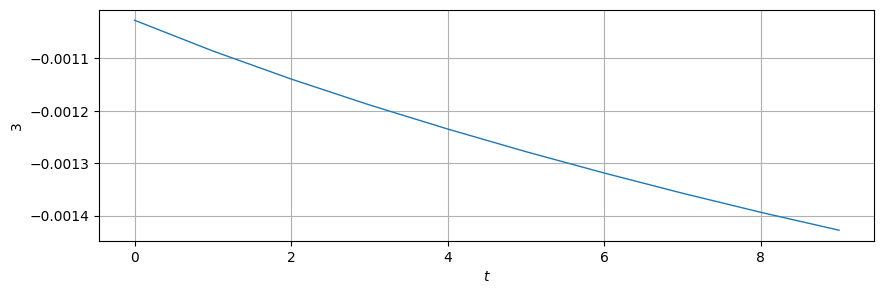

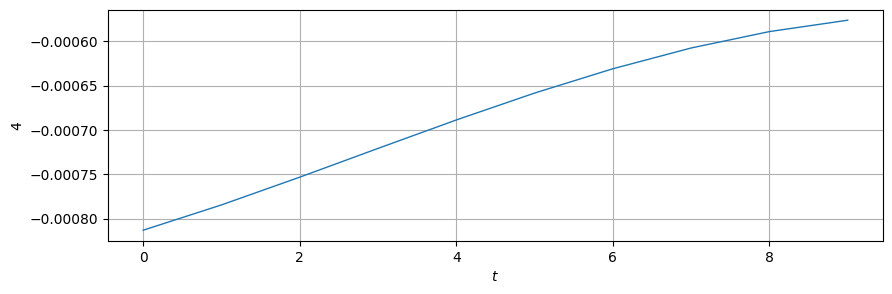

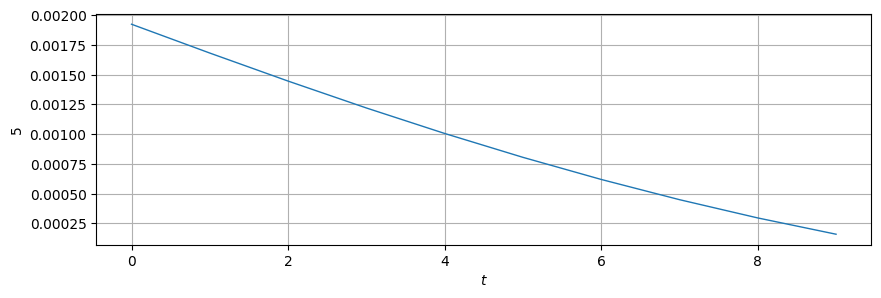

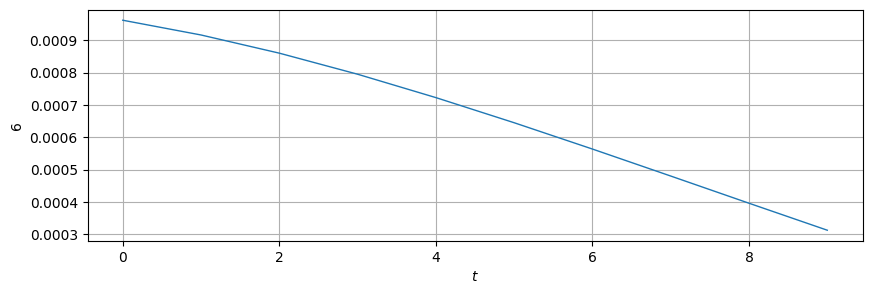

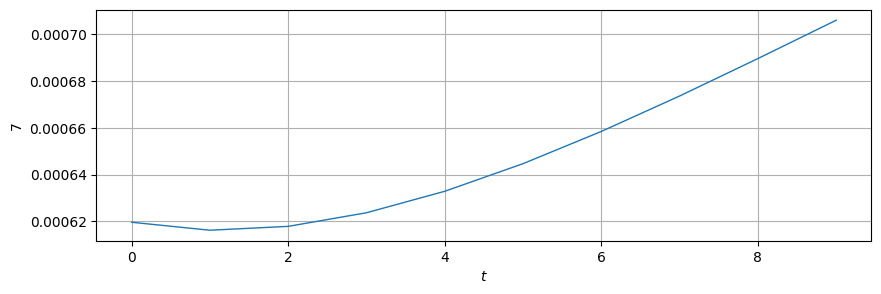

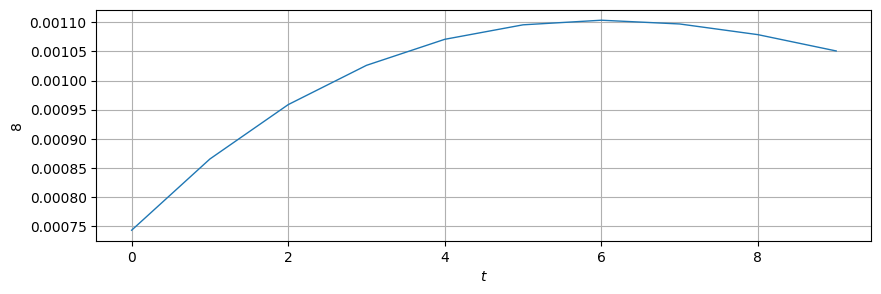

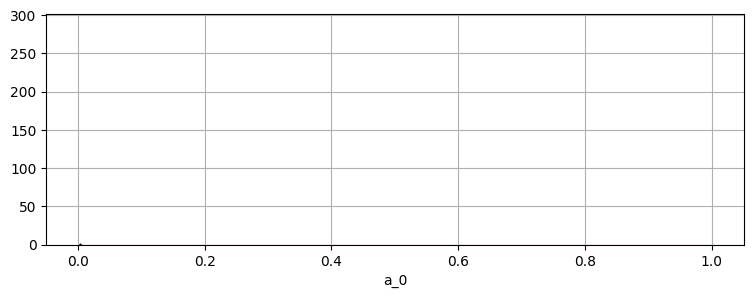

Диапазон:  0.0036349324430178915 0.004172365371565182
Стандартное отклонение:  0.0001775709321273414
10-й процентиль:  0.0037605810862939727
90-й процентиль:  0.004171002675208697


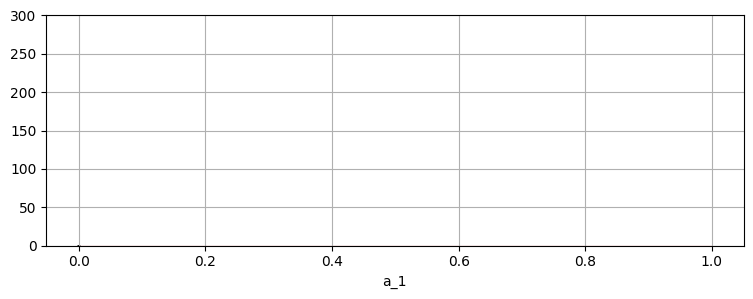

Диапазон:  -0.0015948020814883195 -6.237413719203922e-05
Стандартное отклонение:  0.0004934422366261366
10-й процентиль:  -0.0013795074791966137
90-й процентиль:  -0.0001529848482068009


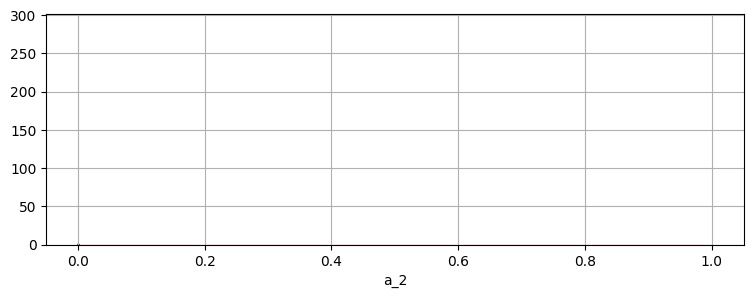

Диапазон:  0.0007537296453474948 0.0008908813825135513
Стандартное отклонение:  4.6585511724807706e-05
10-й процентиль:  0.0007778525192245986
90-й процентиль:  0.0008881980050845246


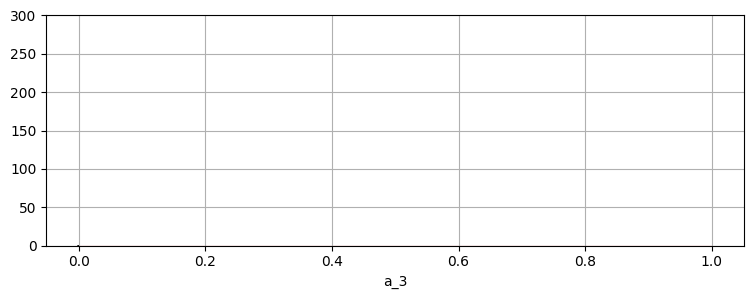

Диапазон:  -0.0014278476900829137 -0.0010271037105636714
Стандартное отклонение:  0.00012725174066540563
10-й процентиль:  -0.0013970723527343299
90-й процентиль:  -0.0010799109941612237


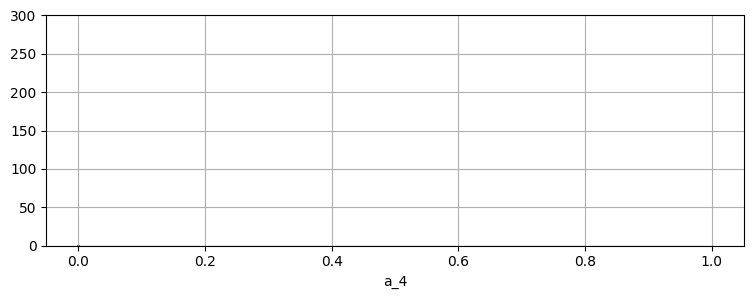

Диапазон:  -0.000813090988013067 -0.0005761283091463035
Стандартное отклонение:  7.93205354379983e-05
10-й процентиль:  -0.000787410392029574
90-й процентиль:  -0.0005876717748303053


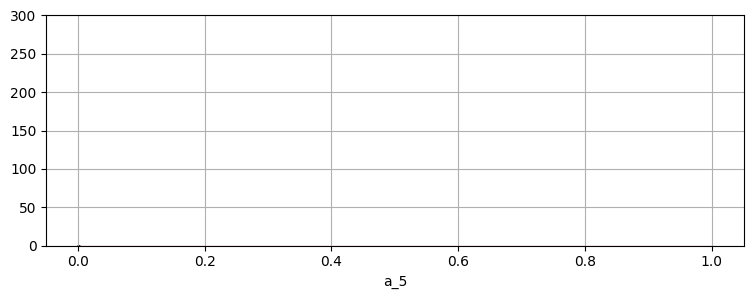

Диапазон:  0.00015875974231862537 0.0019231585373278388
Стандартное отклонение:  0.0005689878914943432
10-й процентиль:  0.0002818811806203764
90-й процентиль:  0.0017051587988324067


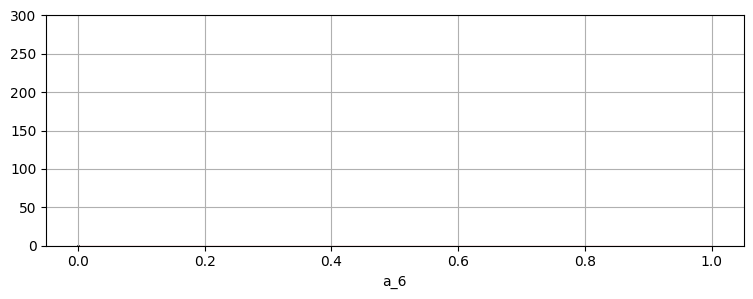

Диапазон:  0.0003128208570716706 0.0009621890786312854
Стандартное отклонение:  0.00021236950156812873
10-й процентиль:  0.00038793847297787545
90-й процентиль:  0.000921101456390853


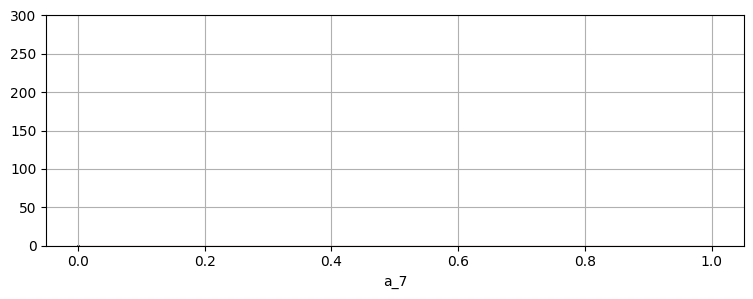

Диапазон:  0.0006161992455968335 0.0007060298198075747
Стандартное отклонение:  3.0697882853506014e-05
10-й процентиль:  0.0006176838147410839
90-й процентиль:  0.000691267584996066


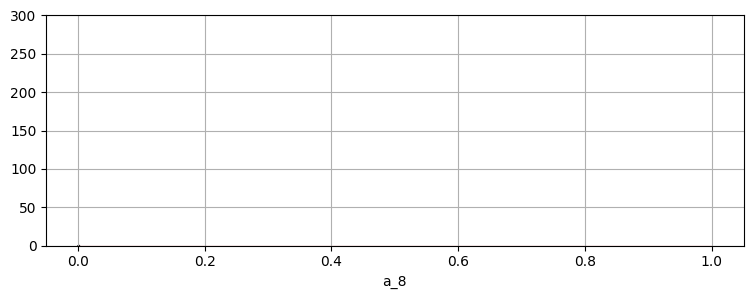

Диапазон:  0.0007430938704032715 0.0011036648109093833
Стандартное отклонение:  0.00011353051321921908
10-й процентиль:  0.0008531788052152379
90-й процентиль:  0.0010978754479637443


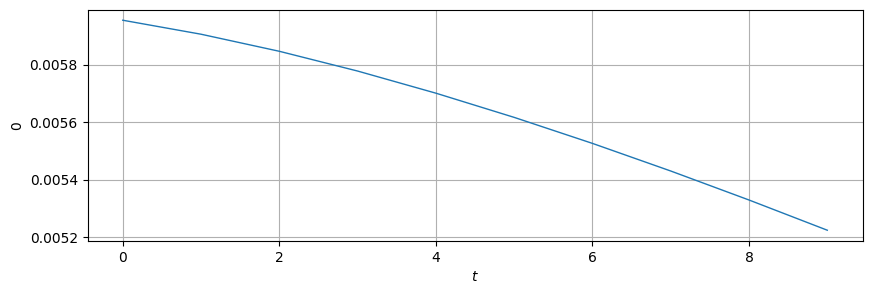

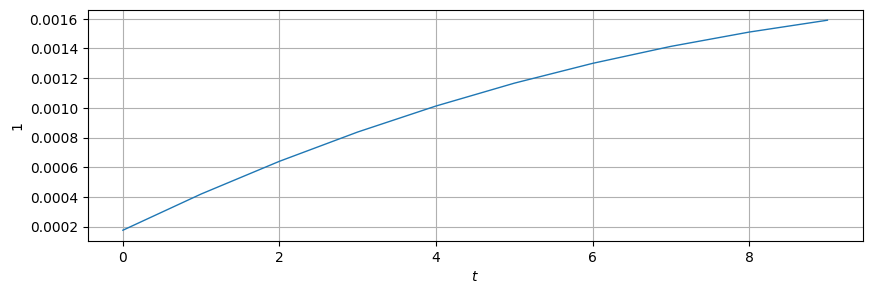

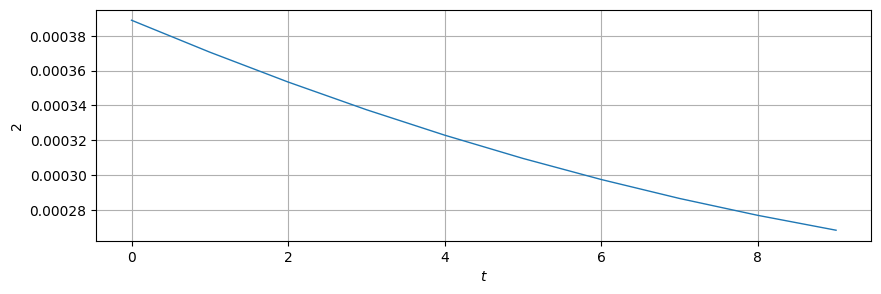

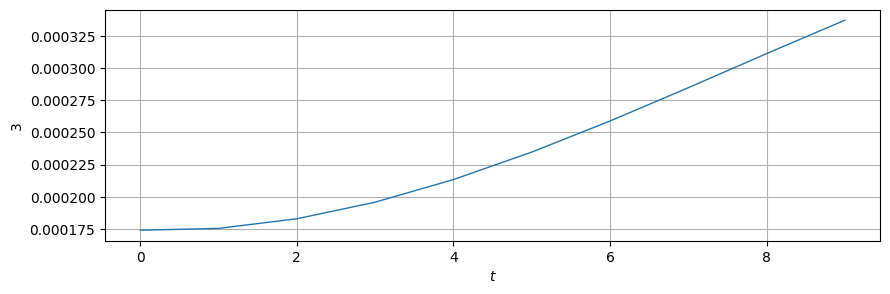

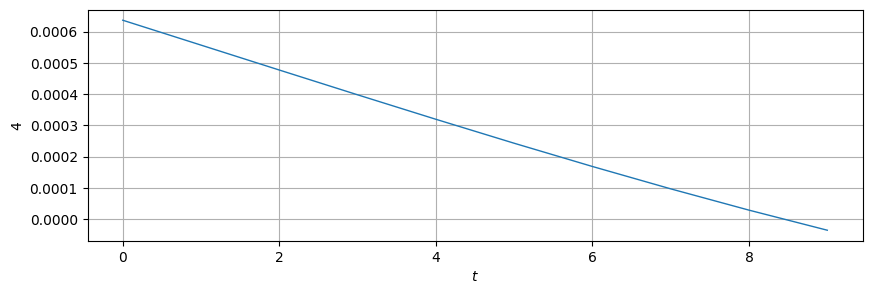

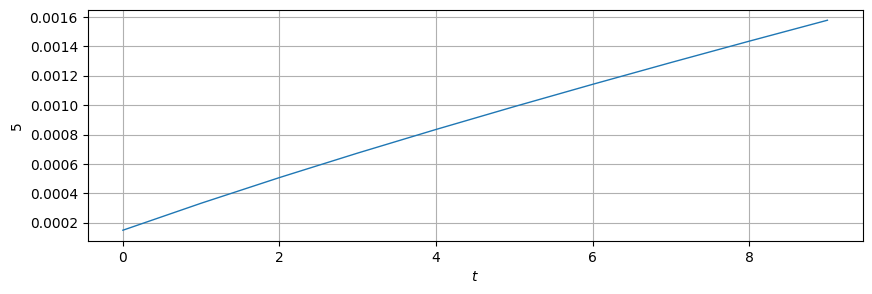

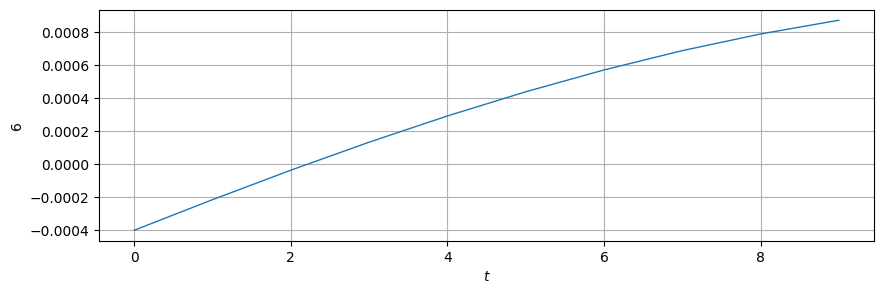

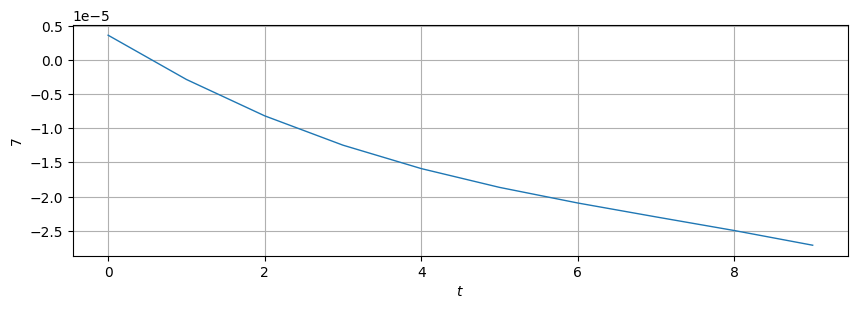

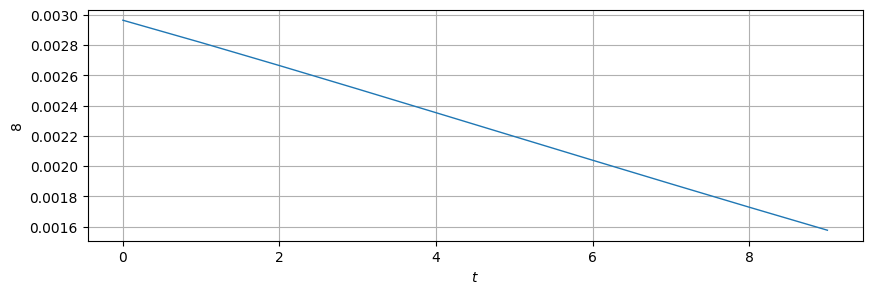

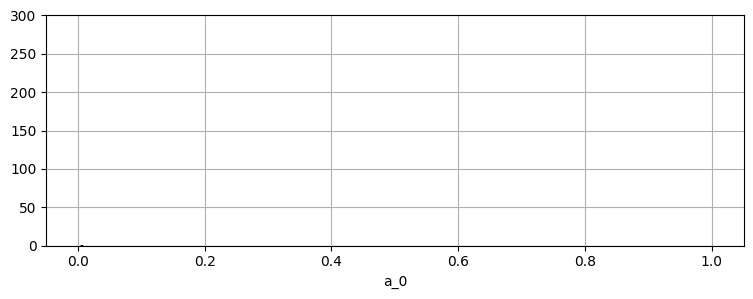

Диапазон:  0.005224297632645873 0.005953866192444891
Стандартное отклонение:  0.00023663578516495797
10-й процентиль:  0.005318770656022664
90-й процентиль:  0.005910095247769112


KeyboardInterrupt: 

In [13]:
for i in range(len(actions)):
    trajectory = np.loadtxt(f'time_series/ad_test{i}.txt')
    m.reset_action()
    
    da = get_B(m, trajectory)

    show_B(da)
    show_B_distribution(da)